In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import keras.models
from keras.layers import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
file = '/content/drive/MyDrive/Btp superconductivity/unique_m.csv'
atoms_df = pd.read_csv(file)
file = '/content/drive/MyDrive/Btp superconductivity/train.csv'
prop_df = pd.read_csv(file)

  

In [ ]:
atoms_df.head()


,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,...,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.15,1.85,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.30,1.70,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [ ]:
atoms_df[ atoms_df['critical_temp'] == 0.00021 ]

,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,...,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
14804,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.00021,Rh1


In [ ]:
prop_df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,...,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,...,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425000,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.250000,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,...,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.905500,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425000,1010.544286,718.152900,938.512777,1.305967,0.78320

In [ ]:
prop_df.count()

number_of_elements       21263
mean_atomic_mass         21263
wtd_mean_atomic_mass     21263
gmean_atomic_mass        21263
wtd_gmean_atomic_mass    21263
                         ...  
range_Valence            21263
wtd_range_Valence        21263
std_Valence              21263
wtd_std_Valence          21263
critical_temp            21263
Length: 82, dtype: int64

In [ ]:
prop_df.isna().sum().sort_values(ascending =False)

critical_temp              0
wtd_std_fie                0
wtd_mean_atomic_radius     0
gmean_atomic_radius        0
wtd_gmean_atomic_radius    0
                          ..
entropy_FusionHeat         0
wtd_entropy_FusionHeat     0
range_FusionHeat           0
wtd_range_FusionHeat       0
number_of_elements         0
Length: 82, dtype: int64

In [ ]:
prop_df.isnull().sum().sort_values(ascending =False)

critical_temp              0
wtd_std_fie                0
wtd_mean_atomic_radius     0
gmean_atomic_radius        0
wtd_gmean_atomic_radius    0
                          ..
entropy_FusionHeat         0
wtd_entropy_FusionHeat     0
range_FusionHeat           0
wtd_range_FusionHeat       0
number_of_elements         0
Length: 82, dtype: int64

In [ ]:
atoms_count = atoms_df.applymap(lambda x: 0 if x == 0 else 1).sum().sort_values(ascending = False)
atoms_count
plt.style.use('ggplot')

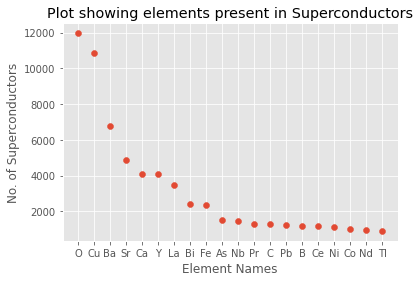

In [ ]:
plt.scatter(x = atoms_count.keys()[2 :22],y = atoms_count.values[2 : 22])
plt.ylabel("No. of Superconductors")
plt.xlabel("Element Names")
plt.title('Plot showing elements present in Superconductors')
plt.show()

In [ ]:
percentages_elements = (atoms_count/atoms_df.shape[0]*100).sort_values(ascending = False)
elements_new = pd.concat([percentages_elements[2:],atoms_count[2:]],axis = 1)
elements_new.columns = ['Percentages' , 'Count']
elements_new[:10]



,Percentages,Count
O,56.266754,11964
Cu,50.971171,10838
Ba,31.749988,6751
Sr,22.818981,4852
Ca,19.338757,4112
Y,19.164746,4075
La,16.286507,3463
Bi,11.235479,2389
Fe,11.000329,2339
As,7.063914,1502


In [ ]:
prop_df['number_of_elements'] = prop_df['number_of_elements'].astype('category')

prop_df['number_of_elements'].value_counts()

5    5792
4    4496
3    3895
2    3280
6    2666
7     774
1     285
8      61
9      14
Name: number_of_elements, dtype: int64

In [ ]:
prop_df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,...,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,...,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425000,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.250000,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,...,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.905500,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425000,1010.544286,718.152900,938.512777,1.305967,0.78320

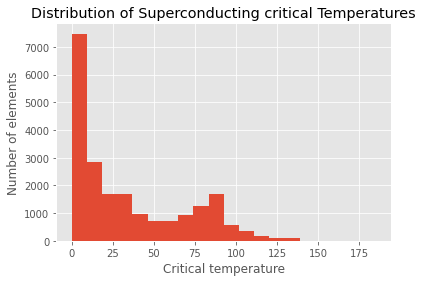

In [ ]:
X_tc = prop_df.critical_temp

plt.hist(X_tc,bins = 20)
plt.title('Distribution of Superconducting critical Temperatures')
plt.ylabel('Number of elements')
plt.xlabel('Critical temperature')
plt.show()

In [ ]:

Stats_Tc = pd.DataFrame(X_tc.describe()).transpose()

Stats_Tc

,count,mean,std,min,25%,50%,75%,max
critical_temp,21263.0,34.421219,34.254362,0.00021,5.365,20.0,63.0,185.0


In [ ]:
atoms_Column_names = []


for i in atoms_df.columns:
  if (i!='critical_temp') & (i!='material'):
    atoms_Column_names.append(i)




In [ ]:
average_temp_element = []

for i in atoms_Column_names:
    average_temp_element.append(atoms_df[(atoms_df[i]>0)]['critical_temp'].mean())




In [ ]:
import operator

dict_elements_temp = {}

for x,y in zip(atoms_Column_names,average_temp_element):
  dict_elements_temp[x] = y


sorted_d = dict( sorted(dict_elements_temp.items(), key=operator.itemgetter(1),reverse=True))

X = []
Y = []

for i,j in sorted_d.items():
  if not(np.isnan(j)):
    X.append(i)
    Y.append(j)




Text(0, 0.5, 'Mean Critical Temperature (K)')

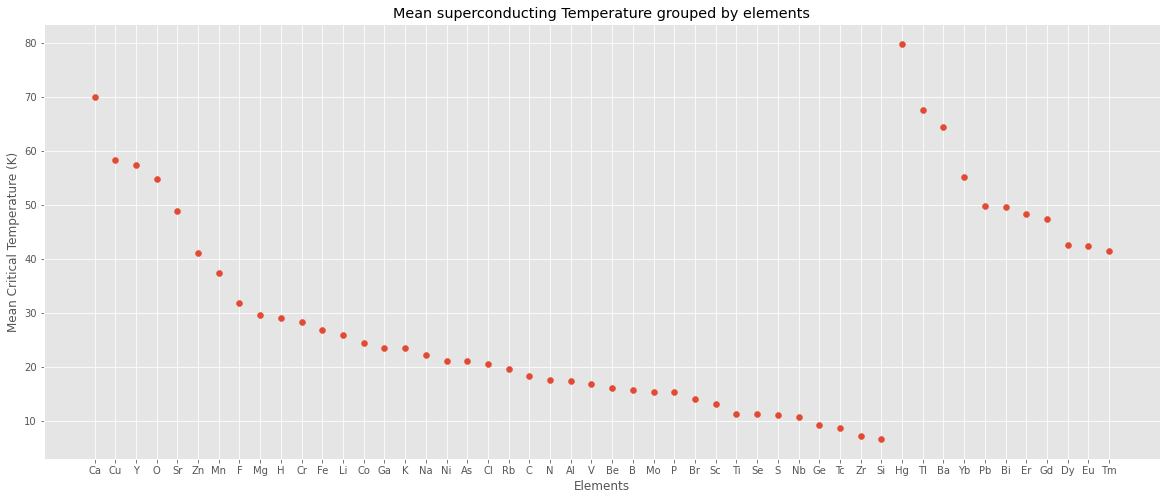

In [ ]:
plt.figure(figsize = (20,8))
plt.scatter(x = X[:50], y = Y[:50])
plt.title("Mean superconducting Temperature grouped by elements")
plt.xlabel("Elements")
plt.ylabel("Mean Critical Temperature (K)")


In [ ]:
std_temp_element = []

for i in atoms_Column_names:
    std_temp_element.append(atoms_df[(atoms_df[i]>0)]['critical_temp'].std(ddof = 0))




In [ ]:
import operator

dict_elements_std = {}

for x,y in zip(atoms_Column_names,std_temp_element):
  dict_elements_std[x] = y


sorted_d_std = dict( sorted(dict_elements_std.items(), key=operator.itemgetter(1),reverse=True))

X_std = []
Y_std = []

for i,j in sorted_d_std.items():
  if not(np.isnan(j)):
    X_std.append(i)
    Y_std.append(j)

Text(0, 0.5, 'SD Critical Temperature (K)')

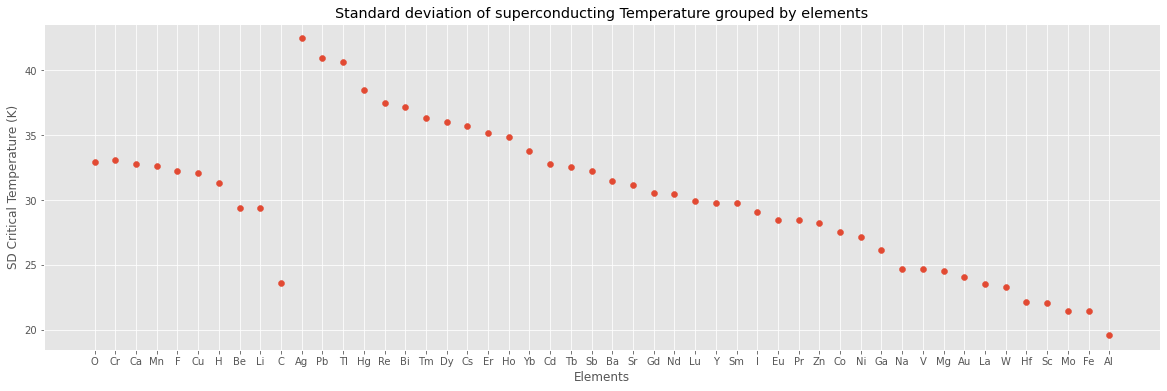

In [ ]:
plt.figure(figsize = (20,6))
plt.scatter(x = X_std[:50], y = Y_std[:50])
plt.title("Standard deviation of superconducting Temperature grouped by elements")
plt.xlabel("Elements")
plt.ylabel("SD Critical Temperature (K)")


In [ ]:
Tc_list = prop_df['critical_temp']

prop_df.drop(['critical_temp'],inplace = True,axis = 1)

X_train2,X_test2,y_train2,y_test2 = train_test_split(prop_df[:],Tc_list,test_size = 0.33, random_state = 123)

# **XGBoost Model**

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import *
from sklearn.model_selection import GridSearchCV


In [ ]:
X_train2.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
18367,5,74.514380,70.178010,68.138099,66.568837,1.516852,1.289448,98.228700,28.399520,33.561503,25.185121,706.42,777.740800,671.783227,752.727056,1.562426,1.152603,527.7,356.740800,211.897762,179.879899,181.600000,157.264000,173.064869,150.627542,1.562133,1.392348,139,55.248000,55.966419,49.056155,5021.400000,5859.384000,3954.761861,5109.838719,1.448640,1.045761,7018.000,2875.024000,2559.630880,...,32.710000,44.838200,17.370134,32.933254,1.215618,0.889090,78.00,31.764000,28.274837,30.029934,11.8360,17.478200,8.786551,14.237113,1.351764,0.894599,25.370,10.903600,8.726132,9.015176,73.400000,64.384000,61.123775,58.684497,1.469857,1.248309,102.00000,27.904000,36.130873,24.068995,2.600000,3.476000,2.267933,3.135547,1.479133,1.008754,4,1.952000,1.356466,1.377470
14147,2,9.911591,10.331315,9.870699,10.298871,0.689024,0.542420,1.798818,5.524818,0.899409,0.795467,849.50,826.493333,848.068252,825.383441,0.691462,0.602148,98.6,347.133333,49.300000,43.602561,99.500000,93.666667,98.711701,93.061973,0.685235,0.626008,25,33.933333,12.500000,11.055416,2154.000000,2296.800000,2132.153841,2279.325083,0.683022,0.519935,612.000,1311.200000,306.000000,...,14.850000,21.080000,6.503845,12.896554,0.200000,0.094024,26.70,20.280000,13.350000,11.807184,28.9750,38.786667,19.937402,30.620286,0.399824,0.212008,42.050,34.546667,21.025000,18.595210,108.500000,70.466667,71.624018,45.429127,0.375648,0.593880,163.00000,30.866667,81.500000,72.081312,2.500000,2.733333,2.449490,2.692549,0.673012,0.493565,1,1.666667,0.500000,0.442217
11608,2,52.458540,52.867104,33.404650,33.751586,0.355777,0.351599,80.895680,40.977724,40.447840,40.445776,874.65,872.518182,848.805349,846.697529,0.663746,0.666045,422.1,202.215152,211.050000,211.039233,132.500000,133.161616,115.178123,115.810174,0.565423,0.561270,131,66.838384,65.500000,65.496658,5415.000000,5446.868687,4400.931720,4430.658001,0.512202,0.507748,6310.000,3209.696970,3155.000000,...,121.500000,121.157576,116.674933,116.337641,0.653702,0.656332,67.80,32.672727,33.900000,33.898271,65.9000,65.505051,53.047149,52.682554,0.504996,0.509458,78.200,38.434343,39.100000,39.098005,97.000000,96.565657,86.948260,86.530922,0.591389,0.595231,86.00000,42.020202,43.000000,42.997806,4.500000,4.505051,4.472136,4.477179,0.686962,0.685799,1,0.545455,0.500000,0.499974
18951,5,57.065500,50.618288,49.553462,40.111840,1.502076,1.461432,71.620600,15.905225,24.404243,29.478233,843.50,924.087500,804.315521

In [ ]:
y_train2.head()

18367    33.50
14147     0.79
11608    11.56
18951    26.00
8990      1.00
Name: critical_temp, dtype: float64

In [ ]:

data_train = X_train2.drop(['number_of_elements'], axis = 1)


In [ ]:
data_test = X_test2.drop(['number_of_elements'], axis = 1)


In [38]:
xgbmodel = xgb.XGBRFRegressor()


params = {
    'n_estimators': [100],
     'max_depth': [20],
    'subsample': [0.5,0.6],
    'eta' : [0.010,0.015,0.02],
    }


gs = GridSearchCV(estimator=xgbmodel, param_grid= params, scoring = 'neg_mean_squared_error',n_jobs=-1,verbose=2)



In [39]:
fitted_model = gs.fit(data_train,y_train2)
fitted_model

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.3min finished


[08:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRFRegressor(base_score=0.5, colsample_bylevel=1,
                                      colsample_bynode=0.8, colsample_bytree=1,
                                      gamma=0, learning_rate=1,
                                      max_delta_step=0, max_depth=3,
                                      min_child_weight=1, missing=None,
                                      n_estimators=100, n_jobs=1, nthread=None,
                                      objective='reg:linear', random_state=0,
                                      reg_alpha=0, reg_lambda=1,
                                      scale_pos_weight=1, seed=None,
                                      silent=None, subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.01, 0.015], 'max_depth': [18, 19],
                         'n_estimators': [100], 'subsample': [0.5, 0.6]},
             pre_dispatch='2*n_jobs', refit

In [40]:
print("Best Grid Search Parameters:", fitted_model.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(fitted_model.best_score_)))

Best Grid Search Parameters: {'eta': 0.01, 'max_depth': 19, 'n_estimators': 100, 'subsample': 0.6}
Lowest RMSE found:  11.216178931408233


In [41]:
ypred = fitted_model.predict(data_test)
mse = mean_squared_error(y_test2,ypred)
rmse = np.sqrt(mse)

print("RMSE on test dataset", rmse)

RMSE on test dataset 10.215914236755127


In [ ]:
#grid_search_params = {'eta': [0.01,0.015,0.020], 'subsample':0.5 ,'max_depth': list(range(15,26)),  'colsample_bytree' : [0.25,0.5,0.75]}

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0) 

In [ ]:
xgbr.fit(data,y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [ ]:
score = xgbr.score(data, y_train2)
print("The score is :", score)

The score is : 0.8725582508786319


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
scores = cross_val_score(xgbr,data, y_train2, cv = 10)
print("CV mean-scores:", scores.mean())

CV mean-scores: 0.857279133352572


In [ ]:
kfold = KFold(n_splits=20,shuffle=True)
kf_cv_scores = cross_val_score(xgbr, data, y_train2, cv = kfold)


In [ ]:
print("K-Fold CV Scores:", kf_cv_scores.mean())

K-Fold CV Scores: 0.8588737958302772


In [ ]:
ypred = xgbr.predict(data2)
mse = mean_squared_error(y_test2,ypred)
print("MSE is:", mse)

rmse = np.sqrt(mse)
print("RMSE is:", rmse)


MSE is: 154.4026563096021
RMSE is: 12.425886540187067


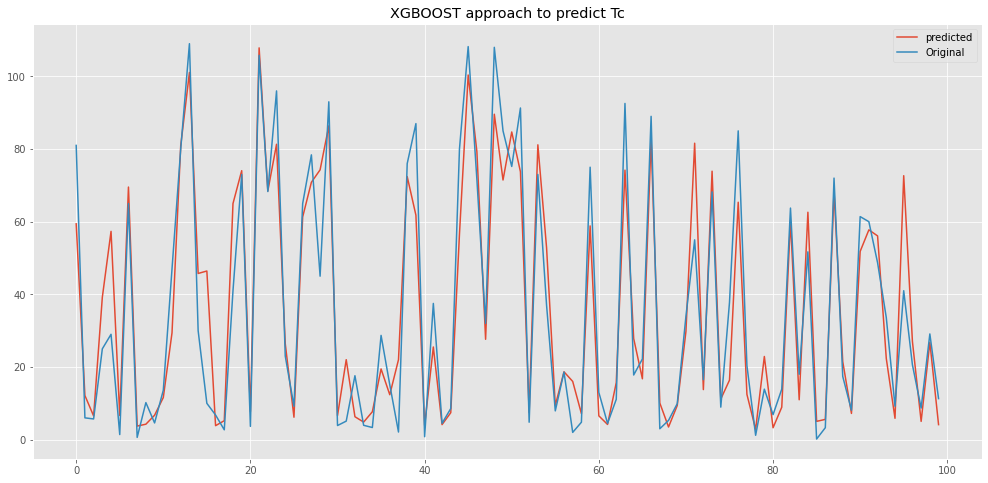

In [ ]:
x_ax = range(len(y_test2[70:170]))
plt.figure(figsize=(17,8))
plt.plot(x_ax, ypred[70:170], label = "predicted")
plt.plot(x_ax, y_test2[70:170], label = "Original")
plt.legend()
plt.title("XGBOOST approach to predict Tc")
plt.show()

In [ ]:
len(y_test2)

7017

In [ ]:
#grid = GridSearchCV(estimator=xgbr, param_grid= grid_search_params, )

In [ ]:
#param = {'max_depth': 16, 'eta': 0.02, 'objective': 'reg:squarederror', 'min_child_weight': 1,'subsample':0.5  }